<a href="https://colab.research.google.com/github/Vikranth3140/Startup-Success-Prediction/blob/main/Startup_Success_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/startup data.csv")
data.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [ ]:
data.isnull()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
919,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
920,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
921,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

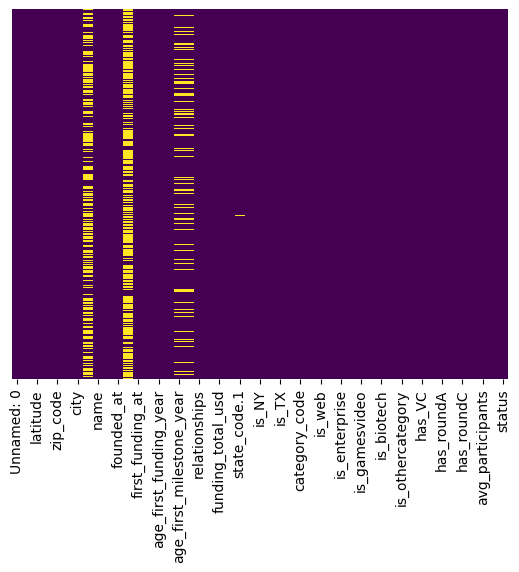

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

<Axes: xlabel='status', ylabel='count'>

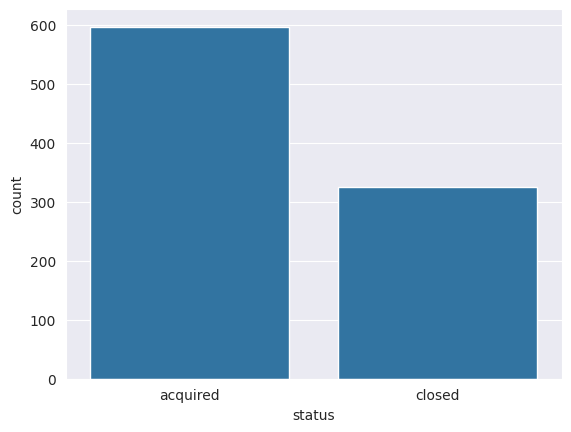

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='status',data=data)

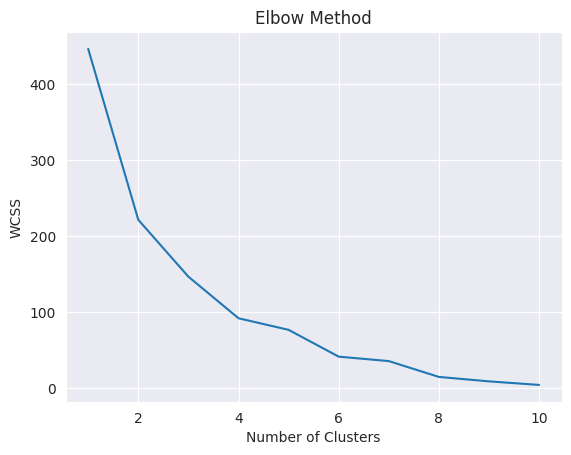

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load your dataset here
# For example, if your dataset is in a CSV file:
# data = pd.read_csv('your_data.csv')

# Ensure the dataset has the required columns
features = ['is_top500', 'status_closed', 'cluster']
if not all(feature in data.columns for feature in features):
    raise ValueError(f"One or more features {features} are missing from the dataset.")

# Feature selection and scaling
X = data[features]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method for optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Optimal number of clusters (manually chosen after looking at the Elbow plot)
optimal_k = 3

# Applying KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Displaying the mean values of each cluster
print(data.groupby('cluster').mean())

# Scatter plot for visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='R&D Spend', y='Profit', hue='cluster', data=data, palette='viridis')
plt.title('KMeans Clustering Results')
plt.show()


In [ ]:
print(data.columns)


Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status_closed', 'cluster'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

y = data['status']
X = data.drop('status', axis=1)

label_encoder = LabelEncoder()

for column in ['state', 'name']:
    if column in X.columns:
        X[column] = label_encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: 'status'

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

NameError: name 'y_test' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load your dataset here
# data = pd.read_csv('your_data.csv')

# Ensure the dataset has the required columns
required_features = ['labels', 'status_closed']




# Feature selection and scaling
X = data[required_features]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method for optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Optimal number of clusters (manually chosen after looking at the Elbow plot)
optimal_k = 3

# Applying KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Displaying the mean values of each cluster
print(data.groupby('cluster').mean())

# Scatter plot for visualization using 'is_top500' and 'status_closed'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='is_top500', y='status_closed', hue='cluster', data=data, palette='viridis')
plt.title('KMeans Clustering Results using Required Features')
plt.xlabel('is_top500')
plt.ylabel('status_closed')
plt.show()




KeyError: "['status_closed'] not in index"

In [ ]:
print("Dataset columns:", data.columns)
print("First few rows of the dataset:")
print(data.head())


Dataset columns: Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')
First few rows of the dataset:
   Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0        1005         CA  42.358880  -71.0568